<a href="https://colab.research.google.com/github/Bhavya0304/Football-Analysis/blob/main/CollabForTraining/TshirtClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install opencv-python

In [ ]:
import cv2 as oc

In [ ]:
video = oc.VideoCapture("./drive/MyDrive/Datasets/match-1.mp4")

In [ ]:
frames = []
while True:
  ret,frame = video.read()
  if ret == False:
    break
  frames.append(frame)

In [ ]:
# 359.31,      721.28,      393.94,      824.54

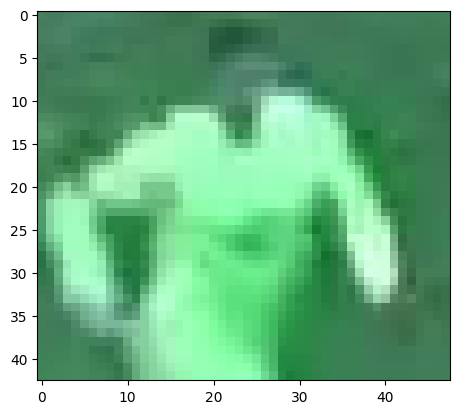

In [ ]:
frame1 = frames[0]
playerframe = frame1[634:634 + int((720 - 634)/2),852:900]
#playerframe = frame1[721:721 + int((825 - 721)/2),359:394]
pyplot.imshow(playerframe)
pyplot.show()
#

In [ ]:
playerframe.shape

(43, 48, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(playerframe.reshape(playerframe.shape[0] * playerframe.shape[1],3))

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
labelarray = np.array(kmeans.labels_).reshape(playerframe.shape[0],playerframe.shape[1])

In [ ]:
kmeans.cluster_centers_

array([[142.74933687, 236.05172414, 171.14456233],
       [ 61.90076336, 131.19389313,  86.21526718]])

In [ ]:
new_image = []
for i in range(len(kmeans.labels_)):
  new_image.append(kmeans.cluster_centers_[kmeans.labels_[i]])
new_image_arr = np.array(new_image).reshape(playerframe.shape[0],playerframe.shape[1],3)

In [ ]:
new_image_arr.shape

(43, 48, 3)

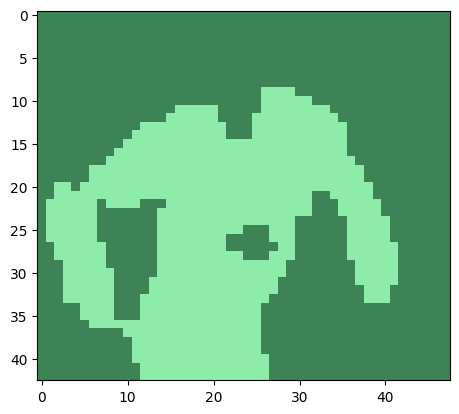

In [ ]:
pyplot.imshow(new_image_arr.astype(np.uint8))
pyplot.show()

In [ ]:
max(set([new_image_arr[0,0],new_image_arr[0,-1],new_image_arr[-1,-1],new_image_arr[-1,0]]),key = new_image_arr.tolist().count)

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
setdata = [labelarray[0,0],labelarray[0,-1],labelarray[-1,-1],labelarray[-1,0]]

In [ ]:
valuetype = max(set(setdata),key = setdata.count)

In [ ]:
tshirtlabel = 1 if valuetype == 0 else 0

In [ ]:
tshirtlabel

0

In [ ]:
tshirtcolor = kmeans.cluster_centers_[tshirtlabel]

In [ ]:
tshirtcolor

array([142.74933687, 236.05172414, 171.14456233])